# Deep learning - Final - LSTM prediction over lyrics


In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
# from google.colab import drive
from keras import backend as K

import os
import csv
import nltk
import string
import numpy as np
import pandas as pd

from sklearn.manifold import TSNE

## Data loading

In [2]:
# drive_path = '/content/gdrive/'
# drive.mount(drive_path)

In [3]:
# path = drive_path + 'MyDrive/Colab Notebooks/Ynov - Deep learning/Semaine 2 - NLP on Keras & Spacy/'
path = os.getcwd() + '/../../'
data_path = path + 'data/lyrics.csv'

# columns = []
# rows = []
# with open(data_path) as csvfile:
#   reader = csv.reader(csvfile, delimiter=',')
#   columns = next(reader)
#   for row in reader:
#     rows.append(row)

In [4]:
# https://www.kaggle.com/datasets/terminate9298/songs-lyrics?resource=download&select=lyrics.csv
df = pd.read_csv(data_path)
df = df.iloc[:,1:5]
df.head(20)

,link,artist,song_name,lyrics
0,../lyrics/backstreetboys/climbingthewalls.html,Backstreet Boys Lyrics,Climbing The Walls,"\n\n[Brian:]\nClose your eyes, make a wish\nTh..."
1,../lyrics/westlife/howtobreakaheart.html,Westlife Lyrics,How To Break A Heart,\n\r\nSince you're not worth my love\nI haven'...
2,../lyrics/deanmartin/iwill.html,Dean Martin Lyrics,I Will,\n\r\nI don't want to be the one to say I'm go...
3,../lyrics/deanmartin/tellyourmotherhello.html,Dean Martin Lyrics,Tell Your Mother Hello,\n\r\nSure I loved the dear money that shines ...
4,../lyrics/deanmartin/behonestwithme.html,Dean Martin Lyrics,Be Honest With Me,\n\r\nBe honest with me dear whatever you do\n...
5,../lyrics/deanmartin/myriflemyponyandme.html,Dean Martin Lyrics,"My Rifle, My Pony And Me",\n\r\nThe sun is sinking in the west\nThe catt...
6,../lyrics/westlife/changeyourmind.html,Westlife Lyrics,Change Your Mind,"\n\r\nHey, girl, it's all over town \r\nSo how..."
7,../lyrics/deanmartin/togetheragain.html,Dean Martin Lyrics,Together Again,\n\r\nTogether again my tears have stopped fal...
8,../lyrics/westlife/fragileheart.html,Westlife Lyrics,Fragile Heart,\n\r\nA fragile heart was broken before\nI don...
9,../lyrics/backstreetboys/everytimeiclosemyeyes...,Backstreet Boys Lyrics,Everytime I Close My Eyes,\n\r\nEverytime I close my eyes\r\nEverytime I...


In [5]:
df = df[df['artist']=='Taylor Swift Lyrics']; df

,link,artist,song_name,lyrics
16,../lyrics/taylorswift/stupidboy.html,Taylor Swift Lyrics,Stupid Boy,"\n\r\nLet me know, how's it feel\nTo be under ..."
18,../lyrics/taylorswift/writingsongsaboutyou.html,Taylor Swift Lyrics,Writing Songs About You,\n\r\nI can't believe you did it again\nWalked...
23,../lyrics/taylorswift/badbloodremix.html,Taylor Swift Lyrics,Bad Blood (Remix),"\n\n[Taylor Swift:]\nâCause, baby, now we've..."
29,../lyrics/taylorswift/longlive.html,Taylor Swift Lyrics,Long Live,\n\r\nI said remember this moment\nIn the back...
32,../lyrics/taylorswift/readyforitbloodpopremix....,Taylor Swift Lyrics,...Ready For It? (BloodpopÂ® Remix),\n\r\nKnew he was a killer first time that I s...
...,...,...,...,...
1262,../lyrics/taylorswift/soitgoes.html,Taylor Swift Lyrics,So It Goes...,"\n\r\nSee you in the dark\nAll eyes on you, my..."
1275,../lyrics/taylorswift/americanboy.html,Taylor Swift Lyrics,American Boy,"\n\r\nAmerican boy, living life as it goes\nSi..."
1283,../lyrics/taylorswift/foreveralwayspianoversio...,Taylor Swift Lyrics,Forever & Always (Piano Version),\n\r\nOnce upon a time\nI believe it was a Tue...
1286,../lyrics/taylorswift/oursong.html,Taylor Swift Lyrics,Our Song,\n\r\nI was riding shotgun\nWith my hair undon...


In [6]:
import re

for col in df.columns:
    df[col] = df[col].str.replace(re.compile('\(.+?\)'), ' ', regex=True)
    df[col] = df[col].str.replace(re.compile('\[.+?\]'), ' ', regex=True)
    df[col] = df[col].str.replace(re.compile('\\n'), ' ', regex=True)
    df[col] = df[col].str.replace(re.compile('\\r'), ' ', regex=True)

df.head(3)

,link,artist,song_name,lyrics
16,../lyrics/taylorswift/stupidboy.html,Taylor Swift Lyrics,Stupid Boy,"Let me know, how's it feel To be under my s..."
18,../lyrics/taylorswift/writingsongsaboutyou.html,Taylor Swift Lyrics,Writing Songs About You,I can't believe you did it again Walked by ...
23,../lyrics/taylorswift/badbloodremix.html,Taylor Swift Lyrics,Bad Blood,"âCause, baby, now we've got bad blood Yo..."


## Data normalization & Tokenization

In [7]:
corpus = df.lyrics

In [8]:
# # Combining all the article snippets into one string
# snippet = '\n'.join(df['lyrics'])
# print(type(snippet))
# print(snippet)

In [9]:
# # applying lowercase for all capitalizations in order to reduce the corpus.
# # splitting each snippet based on newline
# corpus = snippet.lower().split('\n')
# print(len(corpus)) # we have 1,385 snippets from articles

# print(type(corpus))
# print(corpus[:2])

## Building corpus index of known words

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
total_unique_words = len(tokenizer.word_index) + 1 # +1 b/c of OOV words

print(total_unique_words) # we have 6,862 unique words in the corpus plus one (1) for OOV
# print(word_index)

3744


In [11]:
print(tokenizer.word_index['good'])
print(tokenizer.word_index['great'])

112
1128


## Fetch and load the Standford's "GloVe-100" high dimensional word embeddings

In [12]:
# "https://nlp.stanford.edu/projects/glove/"
# model_path = path + 'Ynov - Deep learning/Semaine 2 - NLP on Keras & Spacy/' + 'model/glove.6B.100d.txt'
model_path = path + '/' + 'model/glove.6B.50d.txt'

embeddings_index = {}
with open(model_path) as f:
  for line in f:
    values = line.split()
    word = values[0]
    coeffs = np.array(values[1:], dtype='float32')
    embeddings_index[word] = coeffs

# print out sample word embeddings
dict(list(embeddings_index.items())[0:2])

{'the': array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
        -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
         2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
         1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
        -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
        -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
         4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
         7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
        -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
         1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
       dtype=float32),
 ',': array([ 0.013441,  0.23682 , -0.16899 ,  0.40951 ,  0.63812 ,  0.47709 ,
        -0.42852 , -0.55641 , -0.364   , -0.23938 ,  0.13001 , -0.063734,
        -0.39575 , -0.48162 ,  0.23291 ,  0.090201, -0.13324 ,  0.078639,
        -0.4

## Building the right data type to use embedding

In [13]:
output_dim = 50

In [14]:
# creating a matrix which will store our unique corpus words and their glove embeddings
# embeddings_matrix = np.zeros((total_unique_words, 100))
embeddings_matrix = np.zeros((total_unique_words, output_dim))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector

In [15]:
embeddings_matrix[1:3]

array([[-1.09190005e-03,  3.33240002e-01,  3.57430011e-01,
        -5.40409982e-01,  8.20320010e-01, -4.93910015e-01,
        -3.25879991e-01,  1.99720007e-03, -2.38289997e-01,
         3.55540007e-01, -6.06549978e-01,  9.89319980e-01,
        -2.17859998e-01,  1.12360001e-01,  1.14940000e+00,
         7.32840002e-01,  5.11820018e-01,  2.92869985e-01,
         2.83879995e-01, -1.35899997e+00, -3.79509985e-01,
         5.09429991e-01,  7.07099974e-01,  6.29410028e-01,
         1.05340004e+00, -2.17560005e+00, -1.32040000e+00,
         4.00009990e-01,  1.57410002e+00, -1.65999997e+00,
         3.77209997e+00,  8.69490027e-01, -8.04390013e-01,
         1.83899999e-01, -3.43320012e-01,  1.07140001e-02,
         2.39690006e-01,  6.67480007e-02,  7.01170027e-01,
        -7.37020016e-01,  2.08770007e-01,  1.15640000e-01,
        -1.51899993e-01,  8.59080017e-01,  2.26199999e-01,
         1.65189996e-01,  3.63090008e-01, -4.56970006e-01,
        -4.89690006e-02,  1.13160002e+00],
       [ 1.18

In [16]:
# corpus

In [17]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)): 
    n_gram_seqs = token_list[:i+1] 
    input_sequences.append(n_gram_seqs)

# print(input_sequences)

In [18]:
len(input_sequences) # we have almost 27,000 n_grams

76678

In [19]:
# the length of the largest sequence this will be the input_length for our model
max_seq_length = max([len(x) for x in input_sequences])
max_seq_length

645

In [20]:
# padded input_sequences of tokens for each line
input_seqs = np.array(pad_sequences(input_sequences, maxlen=max_seq_length, padding='pre'))
# print(max_seq_length)
# print(input_seqs[:5])

In [21]:
# creating X-values and y-values
x_values, labels = input_seqs[:, :-1], input_seqs[:, -1]
y_values = tf.keras.utils.to_categorical(labels, num_classes=total_unique_words)

In [22]:
# print(x_values[:3])
# print(labels[:3])

In [23]:
total_unique_words, max_seq_length

(3744, 645)

## Seq2Seq prediction - Building & training the model

2022-06-20 15:51:37.886981: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-20 15:51:38.024285: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-20 15:51:38.024626: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-20 15:51:38.026284: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

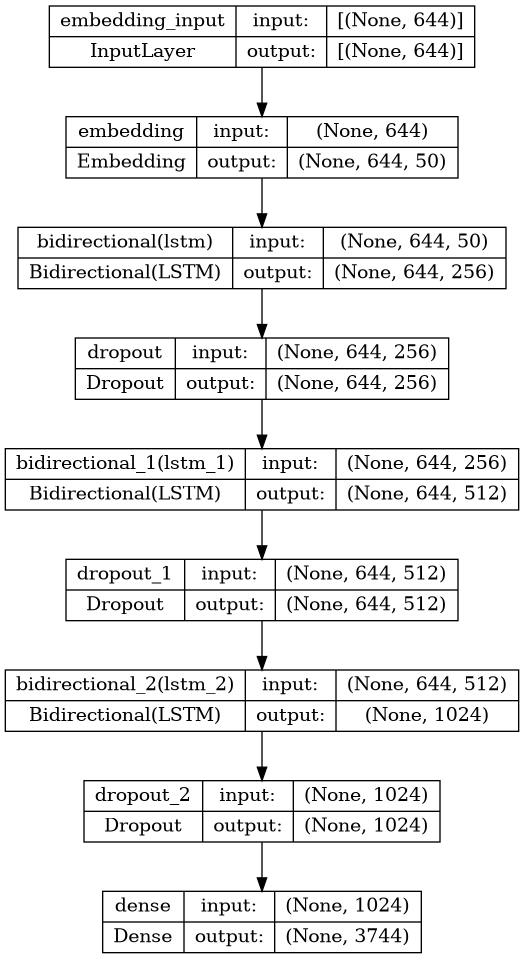

In [24]:
K.clear_session()

'''
callbacks = [EarlyStopping(monitor='val_accuracy', mode='max', patience=7),
             ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/nlp_word_prediction/modelmodel.h5', save_best_only=True, 
                             save_weights_only=False)]
'''

model = tf.keras.Sequential([
                             # input_dim: the total num of unique words which need embeddings
                             # input_length: the largest size of sequences 
                             # output_dim is 100 as we are using GloVe_100 dimensions
                             tf.keras.layers.Embedding(input_dim = total_unique_words, output_dim=output_dim, 
                                                       # subtract one b/c the last word is what we are predicting
                                                       
                                                       weights=[embeddings_matrix],
                                                       input_length=max_seq_length-1,
                                                       trainable=False),
                             # using a bidirectional LSTM we wouldnt get a much repeating words
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512)),
                             tf.keras.layers.Dropout(0.5),
                             # this is our last layer so we are predicting all the words for all one-hot encoding
                             # we could have also used y_values.shape[1] as the input for the dense layer
                             tf.keras.layers.Dense(total_unique_words , activation='softmax')])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
tf.keras.utils.plot_model(model, show_shapes=True)


In [26]:
history = model.fit(x_values, y_values, epochs=100, validation_split=0.2, verbose=1, batch_size=128)

2022-06-20 15:51:41.152743: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 918657792 exceeds 10% of free system memory.
2022-06-20 15:51:41.692341: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 918657792 exceeds 10% of free system memory.


Epoch 1/100


2022-06-20 15:51:47.798479: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8400


480/480 [==============================] - 228s 462ms/step - loss: 6.1018 - accuracy: 0.0506 - val_loss: 5.9200 - val_accuracy: 0.0686
Epoch 2/100
480/480 [==============================] - 224s 466ms/step - loss: 5.7851 - accuracy: 0.0635 - val_loss: 5.7726 - val_accuracy: 0.0731
Epoch 3/100
480/480 [==============================] - 224s 466ms/step - loss: 5.5343 - accuracy: 0.0765 - val_loss: 5.6672 - val_accuracy: 0.0875
Epoch 4/100
480/480 [==============================] - 225s 468ms/step - loss: 5.3058 - accuracy: 0.0924 - val_loss: 5.6152 - val_accuracy: 0.0939
Epoch 5/100
480/480 [==============================] - 229s 477ms/step - loss: 5.1210 - accuracy: 0.1065 - val_loss: 5.5840 - val_accuracy: 0.1017
Epoch 6/100
480/480 [==============================] - 223s 465ms/step - loss: 4.9489 - accuracy: 0.1168 - val_loss: 5.6493 - val_accuracy: 0.1013
Epoch 7/100
480/480 [==============================] - 225s 469ms/step - loss: 4.7885 - accuracy: 0.1316 - val_loss: 5.6199 - val_

In [51]:
path_model_tostore = path + '/model/lstm-taylor_swift.h5'
model.save(path_model_tostore)

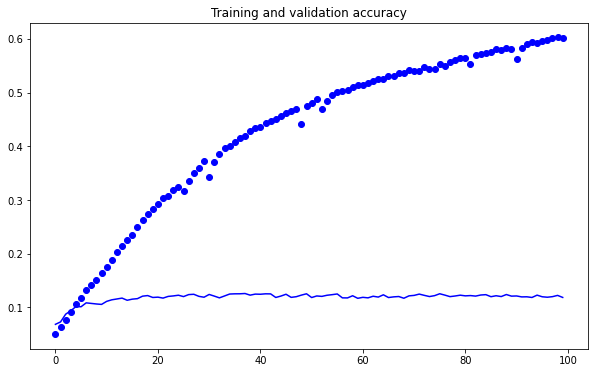

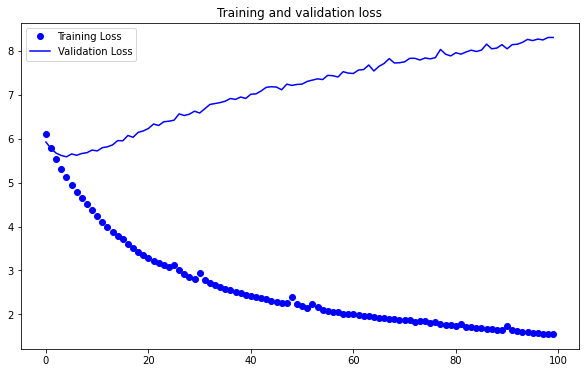

In [27]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10,6))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure(figsize=(10,6))

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Seq2Seq prediction - Predicting sequence from input text

In [ ]:
# model.load(path + '/model/lstm-taylor_swift.h5')

In [28]:
def prediction(seed_text, next_words):
  for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')
  #This will give us the token of the word most likely to be the next one in the sequence
    predicted = np.argmax(model.predict(token_list, verbose=1), axis=-1)

    ouput_word = ""
  # otkenizer.word_index.items() produces the word/index for training words
    for word, index in tokenizer.word_index.items():
    # predicted output is the token/index 
      if index == predicted:
        output_word = word
        break
    seed_text += ' '+output_word
    print(seed_text)

In [44]:
seed_text1 = "You never let me drive"
prediction(seed_text1, 25)

1/1 [==============================] - 0s 56ms/step
You never let me drive you're
1/1 [==============================] - 0s 47ms/step
You never let me drive you're a
1/1 [==============================] - 0s 49ms/step
You never let me drive you're a redneck
1/1 [==============================] - 0s 45ms/step
You never let me drive you're a redneck heartbreak
1/1 [==============================] - 0s 44ms/step
You never let me drive you're a redneck heartbreak who's
1/1 [==============================] - 0s 41ms/step
You never let me drive you're a redneck heartbreak who's really
1/1 [==============================] - 0s 40ms/step
You never let me drive you're a redneck heartbreak who's really bad
1/1 [==============================] - 0s 38ms/step
You never let me drive you're a redneck heartbreak who's really bad at
1/1 [==============================] - 0s 42ms/step
You never let me drive you're a redneck heartbreak who's really bad at lying
1/1 [==============================] - 0s 

In [46]:
seed_text1 = "And if you're missing me"
prediction(seed_text1, 25)

1/1 [==============================] - 0s 45ms/step
And if you're missing me you'd
1/1 [==============================] - 0s 48ms/step
And if you're missing me you'd better
1/1 [==============================] - 0s 46ms/step
And if you're missing me you'd better keep
1/1 [==============================] - 0s 55ms/step
And if you're missing me you'd better keep it
1/1 [==============================] - 0s 54ms/step
And if you're missing me you'd better keep it to
1/1 [==============================] - 0s 51ms/step
And if you're missing me you'd better keep it to yourself
1/1 [==============================] - 0s 57ms/step
And if you're missing me you'd better keep it to yourself and
1/1 [==============================] - 0s 66ms/step
And if you're missing me you'd better keep it to yourself and your
1/1 [==============================] - 0s 80ms/step
And if you're missing me you'd better keep it to yourself and your temper
1/1 [==============================] - 0s 76ms/step
And if you'r

In [47]:
seed_text1 = "I'm just gonna shake"
prediction(seed_text1, 25)

1/1 [==============================] - 0s 73ms/step
I'm just gonna shake and
1/1 [==============================] - 0s 53ms/step
I'm just gonna shake and i
1/1 [==============================] - 0s 48ms/step
I'm just gonna shake and i don't
1/1 [==============================] - 0s 51ms/step
I'm just gonna shake and i don't want
1/1 [==============================] - 0s 50ms/step
I'm just gonna shake and i don't want you
1/1 [==============================] - 0s 47ms/step
I'm just gonna shake and i don't want you like
1/1 [==============================] - 0s 57ms/step
I'm just gonna shake and i don't want you like a
1/1 [==============================] - 0s 83ms/step
I'm just gonna shake and i don't want you like a best
1/1 [==============================] - 0s 84ms/step
I'm just gonna shake and i don't want you like a best friend
1/1 [==============================] - 0s 79ms/step
I'm just gonna shake and i don't want you like a best friend only
1/1 [==============================] -

In [48]:
seed_text1 = " You're really gonna be someone"
prediction(seed_text1, 25)

1/1 [==============================] - 0s 59ms/step
 You're really gonna be someone and
1/1 [==============================] - 0s 57ms/step
 You're really gonna be someone and i
1/1 [==============================] - 0s 51ms/step
 You're really gonna be someone and i know
1/1 [==============================] - 0s 49ms/step
 You're really gonna be someone and i know i
1/1 [==============================] - 0s 45ms/step
 You're really gonna be someone and i know i was
1/1 [==============================] - 0s 46ms/step
 You're really gonna be someone and i know i was a
1/1 [==============================] - 0s 45ms/step
 You're really gonna be someone and i know i was a responsibility
1/1 [==============================] - 0s 63ms/step
 You're really gonna be someone and i know i was a responsibility i
1/1 [==============================] - 0s 60ms/step
 You're really gonna be someone and i know i was a responsibility i was
1/1 [==============================] - 0s 60ms/step
 You're real

In [49]:
seed_text1 = " The smiles, the flowers, everything is gone"
prediction(seed_text1, 25)

1/1 [==============================] - 0s 78ms/step
 The smiles, the flowers, everything is gone gone
1/1 [==============================] - 0s 68ms/step
 The smiles, the flowers, everything is gone gone gone
1/1 [==============================] - 0s 58ms/step
 The smiles, the flowers, everything is gone gone gone gone
1/1 [==============================] - 0s 55ms/step
 The smiles, the flowers, everything is gone gone gone gone gone
1/1 [==============================] - 0s 65ms/step
 The smiles, the flowers, everything is gone gone gone gone gone gone
1/1 [==============================] - 0s 45ms/step
 The smiles, the flowers, everything is gone gone gone gone gone gone gone
1/1 [==============================] - 0s 44ms/step
 The smiles, the flowers, everything is gone gone gone gone gone gone gone gone
1/1 [==============================] - 0s 43ms/step
 The smiles, the flowers, everything is gone gone gone gone gone gone gone gone gone
1/1 [==============================] - 0s 45

In [40]:
seed_text1 = " The smiles, the flowers, everything is gone"
prediction(seed_text1, 35)

1/1 [==============================] - 0s 72ms/step
 The smiles, the flowers, everything is gone gone
1/1 [==============================] - 0s 62ms/step
 The smiles, the flowers, everything is gone gone gone
1/1 [==============================] - 0s 52ms/step
 The smiles, the flowers, everything is gone gone gone gone
1/1 [==============================] - 0s 53ms/step
 The smiles, the flowers, everything is gone gone gone gone gone
1/1 [==============================] - 0s 58ms/step
 The smiles, the flowers, everything is gone gone gone gone gone gone
1/1 [==============================] - 0s 79ms/step
 The smiles, the flowers, everything is gone gone gone gone gone gone gone
1/1 [==============================] - 0s 82ms/step
 The smiles, the flowers, everything is gone gone gone gone gone gone gone gone
1/1 [==============================] - 0s 50ms/step
 The smiles, the flowers, everything is gone gone gone gone gone gone gone gone gone
1/1 [==============================] - 0s 48

In [ ]:
seed_text1 = " We could ever be the same?"
prediction(seed_text1, 35)

1/1 [==============================] - 0s 81ms/step
 We could ever be the same? girl
1/1 [==============================] - 0s 53ms/step
 We could ever be the same? girl picking
1/1 [==============================] - 0s 99ms/step
 We could ever be the same? girl picking daisies
1/1 [==============================] - 0s 108ms/step
 We could ever be the same? girl picking daisies in
1/1 [==============================] - 0s 90ms/step
 We could ever be the same? girl picking daisies in the
1/1 [==============================] - 0s 108ms/step
 We could ever be the same? girl picking daisies in the field
1/1 [==============================] - 0s 91ms/step
 We could ever be the same? girl picking daisies in the field behind
1/1 [==============================] - 0s 108ms/step
 We could ever be the same? girl picking daisies in the field behind and
1/1 [==============================] - 0s 56ms/step
 We could ever be the same? girl picking daisies in the field behind and six
1/1 [============

## Loading our model from filesystem

In [57]:
# loaded_model = tf.keras.models.load_model(path_model_tostore)
loaded_model = tf.keras.models.load_model(path_model_tostore)
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 644, 50)           187200    
                                                                 
 bidirectional (Bidirectiona  (None, 644, 256)         183296    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 644, 256)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 644, 512)         1050624   
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 644, 512)          0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 1024)             4